In [1]:
#train and test data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.linear_model import SGDClassifier
%matplotlib inline

In [2]:
trainData = pd.read_csv('train.csv')

In [3]:
testData = pd.read_csv('test.csv')

In [4]:
trainData.shape

(891, 12)

In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
testData.shape

(418, 11)

In [7]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
trainData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
trainData.head()#Data info

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
trainData.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [12]:
trainData.groupby('Sex')['Age','Fare'].mean()

,Age,Fare
Sex,,
female,27.915709,44.479818
male,30.726645,25.523893


In [13]:
trainData.groupby('Sex')['Age','Fare'].median()

,Age,Fare
Sex,,
female,27.0,23.0
male,29.0,10.5


In [14]:
survived_sex = trainData.groupby(['Sex'])['Survived'].mean()
survived_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [15]:
trainData.groupby(['Sex','Pclass','Fare'])['Survived'].mean()

Sex     Pclass  Fare   
female  1       25.9292    1.000000
                26.2833    1.000000
                26.5500    1.000000
                27.7208    1.000000
                28.7125    0.000000
                             ...   
male    3       34.3750    0.000000
                39.6875    0.000000
                46.9000    0.000000
                56.4958    0.714286
                69.5500    0.000000
Name: Survived, Length: 357, dtype: float64

In [16]:
survived_Pclass = trainData.groupby(['Pclass'])['Survived'].mean()

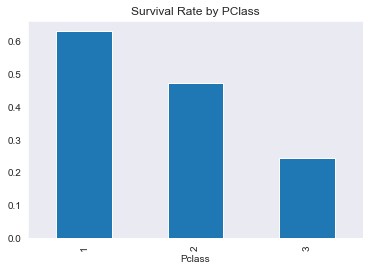

In [17]:
survived_Pclass.plot.bar(title='Survival Rate by PClass')

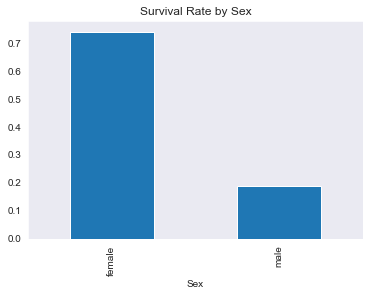

In [18]:
survived_sex.plot.bar(title='Survival Rate by Sex')

In [19]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
trainData[trainData['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [21]:
trainData.groupby(['Embarked','Survived','Pclass'])['Embarked'].count()

Embarked  Survived  Pclass
C         0         1          26
                    2           8
                    3          41
          1         1          59
                    2           9
                    3          25
Q         0         1           1
                    2           1
                    3          45
          1         1           1
                    2           2
                    3          27
S         0         1          53
                    2          88
                    3         286
          1         1          74
                    2          76
                    3          67
Name: Embarked, dtype: int64

In [22]:
trainData.Embarked[trainData['PassengerId'] == 62] = 'C'
trainData.Embarked[trainData['PassengerId'] == 830] = 'S'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
trainData[trainData['PassengerId'] == 830]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [24]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

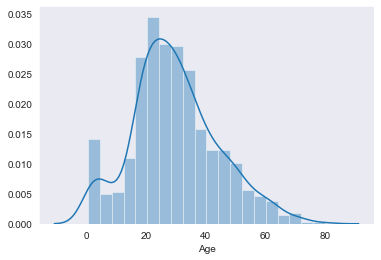

In [25]:
x = trainData.Age[trainData['Age']>0]
sns.distplot(x);

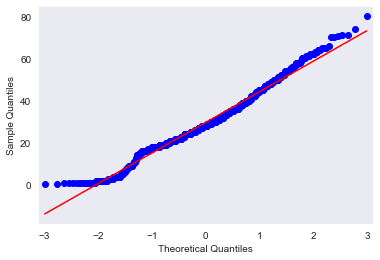

In [26]:
#test normal distribution
qqplot(x, line='s')
plt.show()

In [27]:
stat, p = shapiro(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.981, p=0.000
Sample does not look Gaussian (reject H0)


In [28]:
stat, p = normaltest(x)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=18.105, p=0.000
Sample does not look Gaussian (reject H0)


In [29]:
trainData['family_members'] = trainData.SibSp + trainData.Parch
testData['family_members'] = testData.SibSp + testData.Parch
trainData.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [30]:
trainData['Title'] = trainData.Name.apply(lambda x: x[x.find(',')+1:x.find('.')].strip())
testData['Title'] = testData.Name.apply(lambda x: x[x.find(',')+1:x.find('.')].strip())
trainData.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_members
Title,,,,,,,,
Capt,746.000000,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000,2.000000
Col,671.500000,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000,0.000000
Don,31.000000,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800,0.000000
Dr,545.857143,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457,0.571429
Jonkheer,823.000000,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000
Lady,557.000000,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000,1.000000
Major,493.500000,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000,0.000000
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,3.675000
Miss,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873,1.263736


In [31]:
titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
trainData['Title'] = trainData.Title.map(titles)
testData['Title'] = testData.Title.map(titles)

In [32]:
#dsdsadasda
#create categorical variables
#d={"female":1,"male":0}
#trainData.Sex = trainData.Sex.map(d)
#trainData.head(n=4)
#trainData.SibSp
def med(x,y,z,df):
    median_pclass_sb = df[(df['Sex']== x)&  (df['Pclass']== y)&(df['Title']== z)].Age.mean()
    return median_pclass_sb

In [33]:
trainData['MedianPclassTitle'] = trainData.apply(lambda x: med(x['Sex'], x['Pclass'],x['Title'] , trainData), axis=1)
testData['MedianPclassTitle'] = testData.apply(lambda x: med(x['Sex'], x['Pclass'],x['Title'],testData), axis=1)
trainData['Age'].fillna(trainData['MedianPclassTitle'],inplace=True)
testData['Age'].fillna(testData['MedianPclassTitle'],inplace=True)
trainData['MedianPclassTitle'].fillna(trainData['MedianPclassTitle'].median(),inplace=True)
testData['MedianPclassTitle'].fillna(testData['MedianPclassTitle'].median(),inplace=True)

In [34]:
fareMedianT = testData.Fare[testData['Fare']].median()
fareMedianT

26.0

In [35]:
testData.Fare[testData['Fare'].isnull()] = fareMedianT


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
#trainData.groupby(['Embarked','Survived','Pclass'])['Embarked'].count()
trainData['new_cabin'] = trainData.Cabin[trainData['Cabin'].notna()].apply(lambda x: x[0])
testData['new_cabin'] = testData.Cabin[testData['Cabin'].notna()].apply(lambda x: x[0])

In [37]:
nx = trainData.groupby(['new_cabin'])['Survived'].sum()
nx

new_cabin
A     7
B    35
C    35
D    25
E    24
F     8
G     2
T     0
Name: Survived, dtype: int64

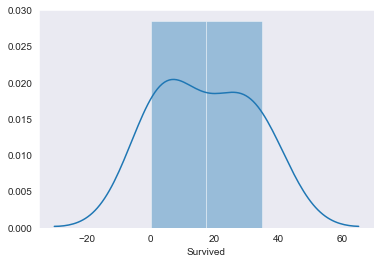

In [38]:
#nx = trainData.new_cabin[trainData['new_cabin'].notna()]
sns.distplot(nx);

In [39]:
stat, p = shapiro(nx)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.874, p=0.165
Sample looks Gaussian (fail to reject H0)


In [40]:
trainData.new_cabin.iloc[:488][trainData['new_cabin'].isnull()] = 'C' #55% 
trainData.new_cabin[trainData['new_cabin'].isnull()]='B' #45%
testData.new_cabin.iloc[:269][testData['new_cabin'].isnull()] = 'C' #65%
testData.new_cabin[testData['new_cabin'].isnull()]='B' #45%
testData.head(n=5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,Title,MedianPclassTitle,new_cabin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,Mr,27.198795,C
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,Mrs,29.875000,C
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,Mr,31.718182,C
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,Mr,27.198795,C
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2,Mrs,29.875000,C


In [41]:
trainData.head(n=5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members,Title,MedianPclassTitle,new_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Mr,28.724891,C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Mrs,40.400000,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss,16.123188,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Mrs,40.400000,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr,28.724891,C


In [42]:
trainData.isnull().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                687
Embarked               0
family_members         0
Title                  0
MedianPclassTitle      0
new_cabin              0
dtype: int64

In [43]:
passenger_Train_Data = trainData[['PassengerId']]
passenger_Train_Data.head(n=10)

,PassengerId
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [44]:
trainData.drop(['PassengerId','Ticket','Cabin','Name'],axis = 1, inplace = True)
testData.drop(['Ticket','Cabin','Name'],axis = 1, inplace = True)

In [45]:
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,MedianPclassTitle,new_cabin
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,28.724891,C
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,40.400000,C
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,16.123188,C
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,40.400000,C
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,28.724891,C


In [46]:
trainData.groupby(['Sex'])['Age'].mean()

Sex
female    27.125565
male      30.681910
Name: Age, dtype: float64

In [47]:
pd.cut(trainData['Age'].astype(int),5)

0       (16.0, 32.0]
1       (32.0, 48.0]
2       (16.0, 32.0]
3       (32.0, 48.0]
4       (32.0, 48.0]
           ...      
886     (16.0, 32.0]
887     (16.0, 32.0]
888    (-0.08, 16.0]
889     (16.0, 32.0]
890     (16.0, 32.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

In [48]:
trainData['Children'] = trainData.Age <=16
trainData['Young'] = (trainData.Age > 16) & (trainData.Age <=32)
trainData['YoungAdults'] = (trainData.Age >32) & (trainData.Age <=48)
trainData['Adults'] = (trainData.Age >48) & (trainData.Age <=64)
trainData['Seniors'] = trainData.Age >64
testData['Children'] = testData.Age <=16
testData['Young'] = (testData.Age > 16) & (testData.Age <=32)
testData['YoungAdults'] = (testData.Age >32) & (testData.Age <=48)
testData['Adults'] = (testData.Age >48) & (testData.Age <=64)
testData['Seniors'] = testData.Age >64
testData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,MedianPclassTitle,new_cabin,Children,Young,YoungAdults,Adults,Seniors
0,892,3,male,34.5,0,0,7.8292,Q,0,Mr,27.198795,C,False,False,True,False,False
1,893,3,female,47.0,1,0,7.0000,S,1,Mrs,29.875000,C,False,False,True,False,False
2,894,2,male,62.0,0,0,9.6875,Q,0,Mr,31.718182,C,False,False,False,True,False
3,895,3,male,27.0,0,0,8.6625,S,0,Mr,27.198795,C,False,True,False,False,False
4,896,3,female,22.0,1,1,12.2875,S,2,Mrs,29.875000,C,False,True,False,False,False


In [49]:
trainData['FamilyGroups'] = pd.cut(trainData['family_members'],3)
trainData.FamilyGroups

0      (-0.01, 3.333]
1      (-0.01, 3.333]
2      (-0.01, 3.333]
3      (-0.01, 3.333]
4      (-0.01, 3.333]
            ...      
886    (-0.01, 3.333]
887    (-0.01, 3.333]
888    (-0.01, 3.333]
889    (-0.01, 3.333]
890    (-0.01, 3.333]
Name: FamilyGroups, Length: 891, dtype: category
Categories (3, interval[float64]): [(-0.01, 3.333] < (3.333, 6.667] < (6.667, 10.0]]

In [50]:
trainData[['FamilyGroups', 'Survived']].groupby(['FamilyGroups']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilyGroups,
"(-0.01, 3.333]",0.400483
"(3.333, 6.667]",0.204082
"(6.667, 10.0]",0.000000


In [51]:
trainData = trainData.drop(['FamilyGroups'], axis=1)
trainData.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,MedianPclassTitle,new_cabin,Children,Young,YoungAdults,Adults,Seniors
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,28.724891,C,False,True,False,False,False
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,40.400000,C,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,16.123188,C,False,True,False,False,False
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,40.400000,C,False,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,28.724891,C,False,False,True,False,False


In [52]:
trainData['Small_Family'] = (trainData.family_members <3) 
trainData['Medium_Family'] = (trainData.family_members >3) & (trainData.family_members <=6)
trainData['Large_Family'] = (trainData.family_members >6)
testData['Small_Family'] = (testData.family_members <3) 
testData['Medium_Family'] = (testData.family_members >3) & (trainData.family_members <=6)
testData['Large_Family'] = (testData.family_members >6)
testData.head(n=5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,MedianPclassTitle,new_cabin,Children,Young,YoungAdults,Adults,Seniors,Small_Family,Medium_Family,Large_Family
0,892,3,male,34.5,0,0,7.8292,Q,0,Mr,27.198795,C,False,False,True,False,False,True,False,False
1,893,3,female,47.0,1,0,7.0000,S,1,Mrs,29.875000,C,False,False,True,False,False,True,False,False
2,894,2,male,62.0,0,0,9.6875,Q,0,Mr,31.718182,C,False,False,False,True,False,True,False,False
3,895,3,male,27.0,0,0,8.6625,S,0,Mr,27.198795,C,False,True,False,False,False,True,False,False
4,896,3,female,22.0,1,1,12.2875,S,2,Mrs,29.875000,C,False,True,False,False,False,True,False,False


In [53]:
trainData['FareInterval'] = pd.cut(trainData['Fare'].astype(int),3)
trainData[['FareInterval','Survived']].groupby(['FareInterval']).mean().sort_values(by='Survived',ascending=False)

,Survived
FareInterval,
"(341.333, 512.0]",1.000000
"(170.667, 341.333]",0.647059
"(-0.512, 170.667]",0.376579


In [54]:
trainData = trainData.drop(['FareInterval'],axis=1)
trainData.head(n=4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,MedianPclassTitle,new_cabin,Children,Young,YoungAdults,Adults,Seniors,Small_Family,Medium_Family,Large_Family
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,28.724891,C,False,True,False,False,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,40.400000,C,False,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,16.123188,C,False,True,False,False,False,True,False,False
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,40.400000,C,False,False,True,False,False,True,False,False


In [55]:
trainData['Small_Fare'] = trainData.Fare < 170
trainData['Medium_Fare'] =  (trainData.Fare > 170) & (trainData.Fare <=341)
trainData['Large_Fare'] = trainData.Fare >341
testData['Small_Fare'] = testData.Fare < 170
testData['Medium_Fare'] =  (testData.Fare > 170) & (testData.Fare <=341)
testData['Large_Fare'] = testData.Fare >341
trainData.head(n=3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,...,Young,YoungAdults,Adults,Seniors,Small_Family,Medium_Family,Large_Family,Small_Fare,Medium_Fare,Large_Fare
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,...,True,False,False,False,True,False,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,...,False,True,False,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,...,True,False,False,False,True,False,False,True,False,False


In [56]:
trainData[['Embarked','Survived']].groupby(['Embarked']).mean().sort_values(by='Survived',ascending=False)

,Survived
Embarked,
C,0.556213
Q,0.389610
S,0.337984


In [57]:
d={'S':1,'Q':2,'C':3}
trainData.Embarked = trainData.Embarked.map(d)
trainData.head(n=20)
testData.Embarked = testData.Embarked.map(d)
testData.head(n=3)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,...,Young,YoungAdults,Adults,Seniors,Small_Family,Medium_Family,Large_Family,Small_Fare,Medium_Fare,Large_Fare
0,892,3,male,34.5,0,0,7.8292,2,0,Mr,...,False,True,False,False,True,False,False,True,False,False
1,893,3,female,47.0,1,0,7.0000,1,1,Mrs,...,False,True,False,False,True,False,False,True,False,False
2,894,2,male,62.0,0,0,9.6875,2,0,Mr,...,False,False,True,False,True,False,False,True,False,False


In [58]:
trainData[['new_cabin','Survived']].groupby(['new_cabin']).mean().sort_values(by='Survived',ascending=False)

,Survived
new_cabin,
D,0.757576
E,0.750000
F,0.615385
G,0.500000
A,0.466667
C,0.359268
B,0.334270
T,0.000000


In [59]:
d={'T':1,'B':2,'C':3,'A':4,'G':5,'F':6,'E':7,'D':8}
trainData.new_cabin = trainData.new_cabin.map(d)
testData.new_cabin = testData.new_cabin.map(d)
trainData.head(n=5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,...,Young,YoungAdults,Adults,Seniors,Small_Family,Medium_Family,Large_Family,Small_Fare,Medium_Fare,Large_Fare
0,0,3,male,22.0,1,0,7.2500,1,1,Mr,...,True,False,False,False,True,False,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,3,1,Mrs,...,False,True,False,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,1,0,Miss,...,True,False,False,False,True,False,False,True,False,False
3,1,1,female,35.0,1,0,53.1000,1,1,Mrs,...,False,True,False,False,True,False,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,1,0,Mr,...,False,True,False,False,True,False,False,True,False,False


In [60]:
Pclass_Fare = trainData.groupby(['Pclass','Small_Fare','Medium_Fare','Large_Fare'])[['Survived']].sum()
Pclass_Fare

Survived
Pclass Small_Fare Medium_Fare Large_Fare          
1      False      False       True               3
                  True        False             11
       True       False       False            122
2      True       False       False             87
3      True       False       False            119

In [61]:
Generation = trainData[['Children','Young','YoungAdults','Adults','Seniors','Survived']].groupby(['Survived']).sum()
Generation

,Children,Young,YoungAdults,Adults,Seniors
Survived,,,,,
0,47.0,315.0,137.0,40.0,10.0
1,57.0,157.0,97.0,30.0,1.0


In [62]:
With_Familiy = trainData[['Small_Family','Medium_Family','Large_Family','Survived']].groupby(['Survived']).sum()
With_Familiy

,Small_Family,Medium_Family,Large_Family
Survived,,,
0,489.0,39.0,13.0
1,311.0,10.0,0.0


In [63]:
trainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_members,Title,...,Young,YoungAdults,Adults,Seniors,Small_Family,Medium_Family,Large_Family,Small_Fare,Medium_Fare,Large_Fare
0,0,3,male,22.0,1,0,7.2500,1,1,Mr,...,True,False,False,False,True,False,False,True,False,False
1,1,1,female,38.0,1,0,71.2833,3,1,Mrs,...,False,True,False,False,True,False,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,1,0,Miss,...,True,False,False,False,True,False,False,True,False,False
3,1,1,female,35.0,1,0,53.1000,1,1,Mrs,...,False,True,False,False,True,False,False,True,False,False
4,0,3,male,35.0,0,0,8.0500,1,0,Mr,...,False,True,False,False,True,False,False,True,False,False


In [64]:
X = pd.get_dummies(trainData, drop_first= True) #pandas get dummies convert categorical variables into numerical variables
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
Survived             891 non-null int64
Pclass               891 non-null int64
Age                  891 non-null float64
SibSp                891 non-null int64
Parch                891 non-null int64
Fare                 891 non-null float64
Embarked             891 non-null int64
family_members       891 non-null int64
MedianPclassTitle    891 non-null float64
new_cabin            891 non-null int64
Children             891 non-null bool
Young                891 non-null bool
YoungAdults          891 non-null bool
Adults               891 non-null bool
Seniors              891 non-null bool
Small_Family         891 non-null bool
Medium_Family        891 non-null bool
Large_Family         891 non-null bool
Small_Fare           891 non-null bool
Medium_Fare          891 non-null bool
Large_Fare           891 non-null bool
Sex_male             891 non-null uint8
Title_Miss          

In [65]:
Y = pd.get_dummies(testData, drop_first= True) #pandas get dummies convert categorical variables into numerical variables
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
PassengerId          418 non-null int64
Pclass               418 non-null int64
Age                  418 non-null float64
SibSp                418 non-null int64
Parch                418 non-null int64
Fare                 418 non-null float64
Embarked             418 non-null int64
family_members       418 non-null int64
MedianPclassTitle    418 non-null float64
new_cabin            418 non-null int64
Children             418 non-null bool
Young                418 non-null bool
YoungAdults          418 non-null bool
Adults               418 non-null bool
Seniors              418 non-null bool
Small_Family         418 non-null bool
Medium_Family        418 non-null bool
Large_Family         418 non-null bool
Small_Fare           418 non-null bool
Medium_Fare          418 non-null bool
Large_Fare           418 non-null bool
Sex_male             418 non-null uint8
Title_Miss          

In [66]:
X.head(n=5)
#create categorical variables
#d={"male":0,"female":1}
#trainData.Sex = trainData.Sex.map(d)
#testData.Sex = testData.Sex.map(d)
#trainData.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,family_members,MedianPclassTitle,new_cabin,...,Large_Family,Small_Fare,Medium_Fare,Large_Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,3,22.0,1,0,7.2500,1,1,28.724891,3,...,False,True,False,False,1,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,3,1,40.400000,3,...,False,True,False,False,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,16.123188,3,...,False,True,False,False,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,1,1,40.400000,3,...,False,True,False,False,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,28.724891,3,...,False,True,False,False,1,0,1,0,0,0


<h1> Modeling </h1>

In [67]:
#Is a classification problem
#logistic regretion problem
column_train = X.columns
column_test = Y.columns
set(column_train) - set(column_test)


{'Survived'}

In [68]:
prediction = X.drop(['Survived'], axis=1)
target = X["Survived"]
x_train, x_val, y_train, y_val = train_test_split(prediction, target, test_size = 0.22, random_state = 0)

In [69]:
#Gaussian NB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

82.23


In [70]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

83.25


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
#Support vector machines
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

73.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [72]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

80.71


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [73]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

72.59


In [74]:
#Decision trees
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

74.62


In [75]:
#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

81.73


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [76]:
#K Neighbors
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)
y_pred = kn.predict(x_val)
acc_kn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_kn)

71.07


In [77]:
#STOCASTIC Gradient descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.68


In [78]:
#Gradient Boosting
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.76


In [79]:
metrics = pd.DataFrame({
    'Metric': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_kn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
metrics.sort_values(by='Score', ascending=False)

,Metric,Score
9,Gradient Boosting Classifier,83.76
2,Logistic Regression,83.25
4,Naive Bayes,82.23
3,Random Forest,81.73
6,Linear SVC,80.71
8,Stochastic Gradient Descent,78.68
7,Decision Tree,74.62
0,Support Vector Machines,73.60
5,Perceptron,72.59
1,KNN,71.07


In [80]:
passenger_Test_Data = testData[['PassengerId']]
survivors = randomforest.predict(testData.drop('PassengerId', axis=1))
testData['PassengerId'] = passenger_Test_Data
testData['Survived'] = survivors
submit = testData[['PassengerId','Survived']]
submit

ValueError: could not convert string to float: 'male'

In [ ]:
submit.to_csv('submission.csv',index=False)
#
#feature_importance
#seaborn.pariplot(data)
#import pandas_profiling
#pandas_profilong.ProfileReport(data)

In [ ]:
#pd.cut to create grouping values
#looking Fare and Pclass to get the median from them in each group